In [2]:
import tensorflow as tf
import timeit
from datetime import datetime

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


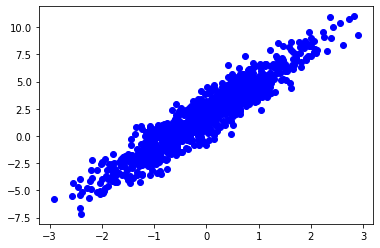

In [37]:
true_w=3.0
true_b=2.
num_examples=1000
x=tf.random.normal(shape=[num_examples])
noise=tf.random.normal(shape=[num_examples])
y=x*true_w+true_b+noise
import matplotlib.pyplot as plt
plt.scatter(x,y,c='b')
plt.show()

In [38]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # 初始化权重值为`5.0`，偏差值为`0.0`
    # 实际项目中，应该随机初始化
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.w * x + self.b

model = MyModel()

# 列出变量tf.modules的内置变量聚合
print("Variables:", model.variables)

# 验证模型是否有效
assert model(3.0).numpy() == 15.0

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


In [39]:
def loss(target_y, predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y))

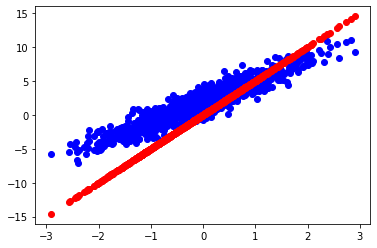

Current loss: 9.370564


In [40]:
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())

In [51]:
# 给定一个可调用的模型，输入，输出和学习率...
def train(model, x, y, learning_rate):
    with tf.GradientTape() as t:
        # 可训练变量由GradientTape自动跟踪
        current_loss = loss(y, model(x))
    # 使用GradientTape计算相对于W和b的梯度
    dw, db = t.gradient(current_loss, [model.w, model.b])

    # 减去由学习率缩放的梯度
    model.w.assign_sub(learning_rate * dw)  #assign_sub将w值减去括号内得值
    model.b.assign_sub(learning_rate * db)

In [70]:
model = MyModel()

# 收集W值和b值的历史记录以供以后绘制
Ws, bs = [], []
epochs = range(10)

# 定义用于训练的循环
def training_loop(model, x, y):

  for epoch in epochs:
    # 用单个大批次处理更新模型
    train(model, x, y, learning_rate=0.1)

    # 在更新之前进行跟踪
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(y, model(x))

    print("Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f" %
          (epoch, Ws[-1], bs[-1], current_loss))

Starting: W=5.00 b=0.00, loss=9.37056
Epoch  0: W=4.59 b=0.43, loss=6.27297
Epoch  1: W=4.27 b=0.76, loss=4.32545
Epoch  2: W=4.02 b=1.03, loss=3.10090
Epoch  3: W=3.81 b=1.24, loss=2.33086
Epoch  4: W=3.65 b=1.40, loss=1.84658
Epoch  5: W=3.52 b=1.53, loss=1.54199
Epoch  6: W=3.41 b=1.64, loss=1.35039
Epoch  7: W=3.33 b=1.72, loss=1.22986
Epoch  8: W=3.26 b=1.78, loss=1.15402
Epoch  9: W=3.21 b=1.83, loss=1.10629


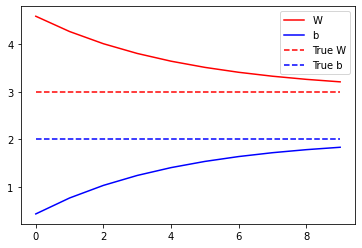

In [69]:
print("Starting: W=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w, model.b, loss(y, model(x))))

# 开始训练
training_loop(model, x, y)

# 绘制
plt.plot(epochs, Ws, "r",
         epochs, bs, "b")

plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.show()

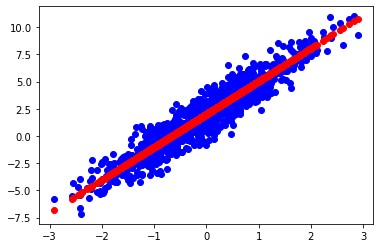

Current loss: 1.026001


In [62]:
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())

In [67]:
class MyModelKeras(tf.keras.Model):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
        self.w=tf.Variable(5.0)
        self.b=tf.Variable(0.0)
    def __call__(self,x,**kwargs):
        return self.w*x+self.b
keras_model=MyModelKeras()
keras_model.save_weights('my_checkpoints')

In [68]:
keras_model.b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [1]:
from google.colab import files

ModuleNotFoundError: No module named 'google.colab'